In [20]:
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
cd /content/drive/MyDrive/Self_driving

/content/drive/MyDrive/Self_driving


In [22]:
# !git clone https://github.com/WongKinYiu/yolov7.git

In [23]:
cd yolov7

/content/drive/MyDrive/Self_driving/yolov7


In [24]:
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [26]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=39afc0081591d537299cd44f54a20ed99c3ae3725a6fb5903c09aa43dcfd5af4
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [28]:
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 100 --img 640 640 --data /content/drive/MyDrive/Self_driving/Dataset/data.yaml --hyp data/hyp.scratch.custom.yaml --name road_objects --weights yolov7.pt

2023-06-07 09:54:05.569706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 09:54:06.449786: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='yolov7.pt', cfg='', data='/content/drive/MyDrive/Self_driving/Dataset/data.yaml', hyp='data/hyp.scratch.custom.yaml', epochs=100, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=1, project='runs/train', entity=None, name='road_objects', exis

In [29]:
!python test.py --weights runs/train/road_objects/weights/best.pt --data /content/drive/MyDrive/Self_driving/Dataset/data.yaml --name road_objects

Namespace(weights=['runs/train/road_objects/weights/best.pt'], data='/content/drive/MyDrive/Self_driving/Dataset/data.yaml', batch_size=32, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='road_objects', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36528391 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model t

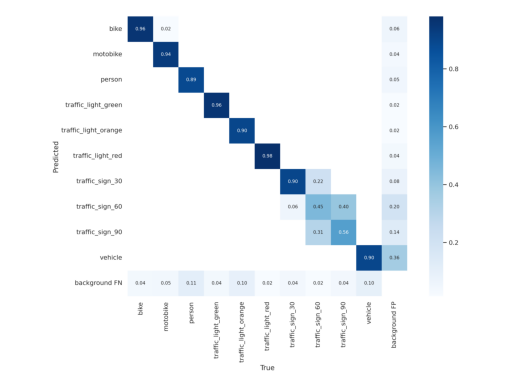

In [31]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg  
image = mpimg.imread('runs/test/road_objects/confusion_matrix.png')  
plt.imshow(image) 
plt.axis('off')  
plt.show()